# 와인 품종 분류

## 패키지 로딩

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# 랜덤포레스트
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # 모델 평가지표

import pandas as pd

## 데이터 로드 및 확인

In [9]:
wine_data = load_wine()
# print(wine_data.DESCR)
# 178개의 레코드
# 속성값은 13개로 모두 수치형 데이터
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['class'] = wine_data.target
df.describe()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 데이터 스케일링 및 분할

In [3]:
x = wine_data.data
y = wine_data.target

scaled_data = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    stratify=y)
# stratify=y : 분류마다 1:1:1 비율에 따라 추출해야하므로 분류데이터에서는 무조건 사용해야함
# 랜덤하게 데이터를 가져오다보니 아래의 학습 결과는 다를 수 있음

## 모델 생성
- RandomForestClassifier 파라미터
    - bootstrap : 부트스트랩 사용여부 지정 (DEFAULT : True // True면 복원 추출된 부트스트랩 표본으로 학습 // False면 비복원 추출된 표본 전체를 이용하여 학습)
    - criterion : 트리 분할에 사용할 알고리즘 (두 가지 방식 : entropy 앤트로피, gini지니계수)
    - max_depth : 나무의 최대 깊이
    - min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플의 개수 (과적합 방지)
    - n_estimators: 생성할 트리의 개수 (DEFAULT : 100)

In [ ]:
# model = RandomForestClassifier()
# model.fit(x_train, y_train)

In [13]:
model = RandomForestClassifier(min_samples_split=3, criterion='entropy', bootstrap=False)
# min_samples_split : 노드 분할 시 필요한 최소 샘플의 수 : 숫자가 클수록 나무의 깊이가 얕아질 것
# criterion : 지니계수 또는 엔트로피(정보획득량) 중 어떤 것을 기준으로 할 지
# bootstrap : False면 비복원이므로 전체 데이터 사용
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       min_samples_split=3)

## 모델 평가

In [14]:
y_hat = model.predict(x_test)
print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')
print(confusion_matrix(y_test, y_hat))
# [ 1 20  0] : 실제로는 class-1번인 것을 class-0번으로 오분류

# 분류모형 평가지표 한 번에 조회하기
report = classification_report(y_test, y_hat)
print(report)
#

정확도: 1.000
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## 트리 시각화

In [15]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[2]
# 100개의 의사결정 나무 중 n번째 나무를 지정하여 조회
# estimators_는 리스트 형태로 되어있으므로 indexing하여 n을 지정
export_graphviz(estimator, out_file='tree.dot',
               class_names=wine_data.target_names,
               feature_names=wine_data.feature_names,
               precision=3, # 소수점 정밀도
               filled=True, # 클래스별로 분기노드 색상 채우기 여부
               rounded=True # 분기노드의 박스모양 둥글 여부
               )

# estimator : 내보내고자 하는 분류기 이름
# out_file='tree.dot' : 저장하고자하는 파일명
# class_names : 와인 데이터 객체의 target 이름 (ex. 붓꽃 3종의 이름)

- 외부 모듈 설치를 통해 화면 띄우기
    - graphviz 패키지 설치
        - anaconda prompt 실행
        - conda install python-graphviz
        - 주피터노트북 재기동
        - Run All

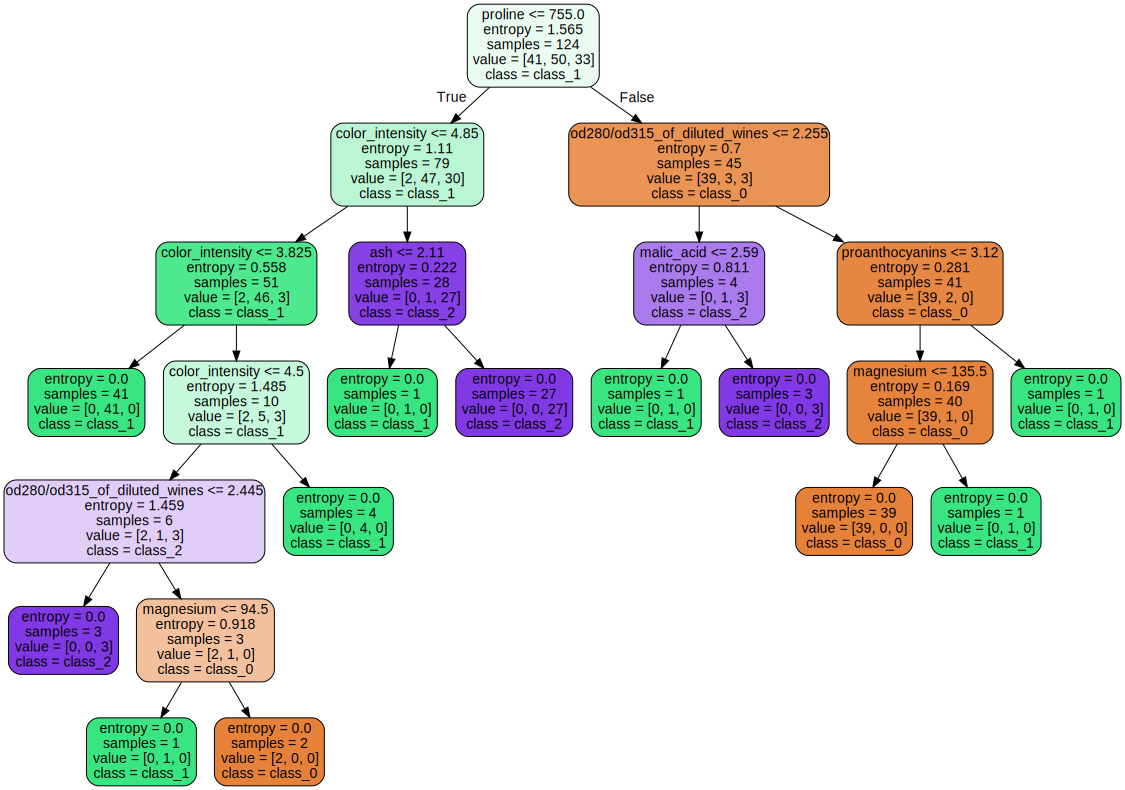

In [16]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


# 1
# gini
# 지니계수가 높다는 것은 다양한 샘플이 섞여 있다는 의미이므로, 트리가 깊어질수록 지니계수가 낮아질 것
# 지니계수가 0 : 샘플이 1 종류이다

# samples
# Bootstrap이 True이므로 복원추출된 83개의 데이터로 분류를 실행한 것

# value
# 각 클래스별 sample의 개수 -> 총 124개
# 178개의 전체 데이터 중 70%를 차지하는 train 학습용 데이터가 124개이므로

# class
# 52개가 가장 많으므로 다수결에 따라 class_1로 분류한 것


# 2
# entropy

# samples
# Bootstrap이 False이므로 비복원추출된 124개의 전체 데이터로 분류를 실행한 것



# 정확도가 1이므로 hyper tunning하지 않겠습니다

## Feature Importance
- DecisionTree 알고리즘이 학습을 통해 규칙을 정하는 데 있어서 피쳐의 중요한 역할 지표를 제공하는 속성
- 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미로 해석

In [17]:
# 13개 독립변수 각각의 중요도
model.feature_importances_

array([0.10647574, 0.02837542, 0.01650628, 0.02678459, 0.02867447,
       0.04480525, 0.18375044, 0.01256211, 0.01741231, 0.15926218,
       0.09069634, 0.13428493, 0.15040993])

In [20]:
importance = { k:v for k, v in zip(wine_data.feature_names, model.feature_importances_)}
df_importance = pd.DataFrame(pd.Series(importance), columns=['importance'])
df_importance = df_importance.sort_values('importance',  ascending=False)
df_importance
# 중요도 기준 내림차순으로 정렬
# 와인 품종 분류에 있어서 가장 중요한 feature는 flavanoids
# 플라보노이드(토마토 등에서 발견되는 물질로 항암, 심장질환 예방 효과가 있는 것으로 여겨짐)

,importance
flavanoids,0.183750
color_intensity,0.159262
proline,0.150410
od280/od315_of_diluted_wines,0.134285
alcohol,0.106476
hue,0.090696
total_phenols,0.044805
magnesium,0.028674
malic_acid,0.028375
alcalinity_of_ash,0.026785


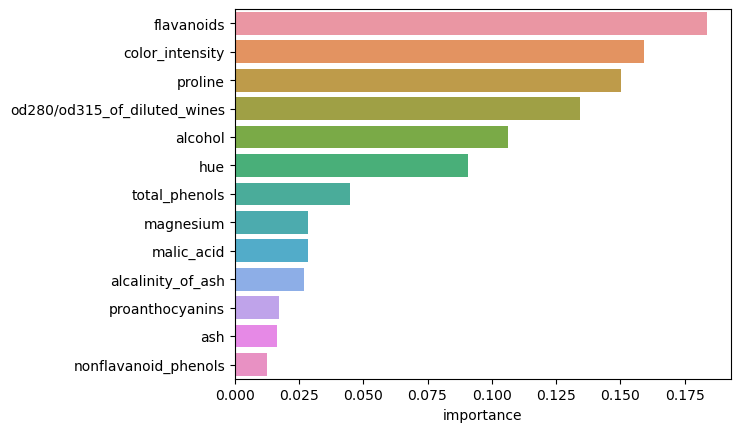

In [21]:
# 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

# sns.barplot() : plt.bar()과 유사
sns.barplot(data=df_importance, x='importance', y=df_importance.index)
plt.show()